<a href="https://colab.research.google.com/github/Abhijeet3407/Artifical-Inteligence/blob/main/Week-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from tensorflow.keras.layers import BatchNormalization,Flatten,Dropout,Dense,Conv2D,MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.models import Sequential # Import Sequential directly
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the MNIST dataset
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

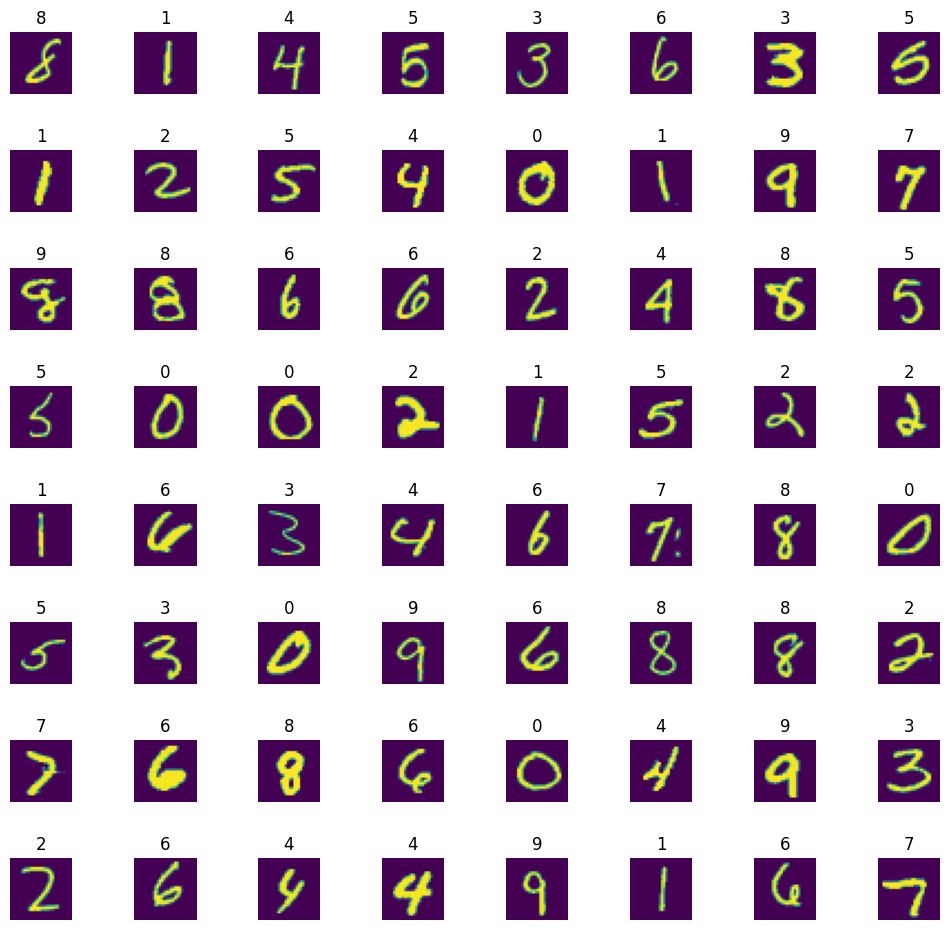

In [ ]:
# Display some images
from sklearn.utils import shuffle
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt


    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(Y_rand.item(i)))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return
num_row = 8
num_col = 8
showImages(num_row,num_col,X =X_train,Y = y_train)

In [ ]:
# Preprocessing the dataset
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
model=Sequential()
# model.add(Flatten(input_shape=(28,28)))
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size = 4, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_split=0.2,epochs=5,batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8514 - loss: 0.4769 - val_accuracy: 0.9840 - val_loss: 0.0505
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9812 - loss: 0.0634 - val_accuracy: 0.9868 - val_loss: 0.0451
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9864 - loss: 0.0470 - val_accuracy: 0.9884 - val_loss: 0.0423
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9873 - loss: 0.0404 - val_accuracy: 0.9889 - val_loss: 0.0385
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9904 - loss: 0.0320 - val_accuracy: 0.9902 - val_loss: 0.0342


In [ ]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9905 - loss: 0.0274
Test accuracy: 0.9926999807357788


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 415ms/step


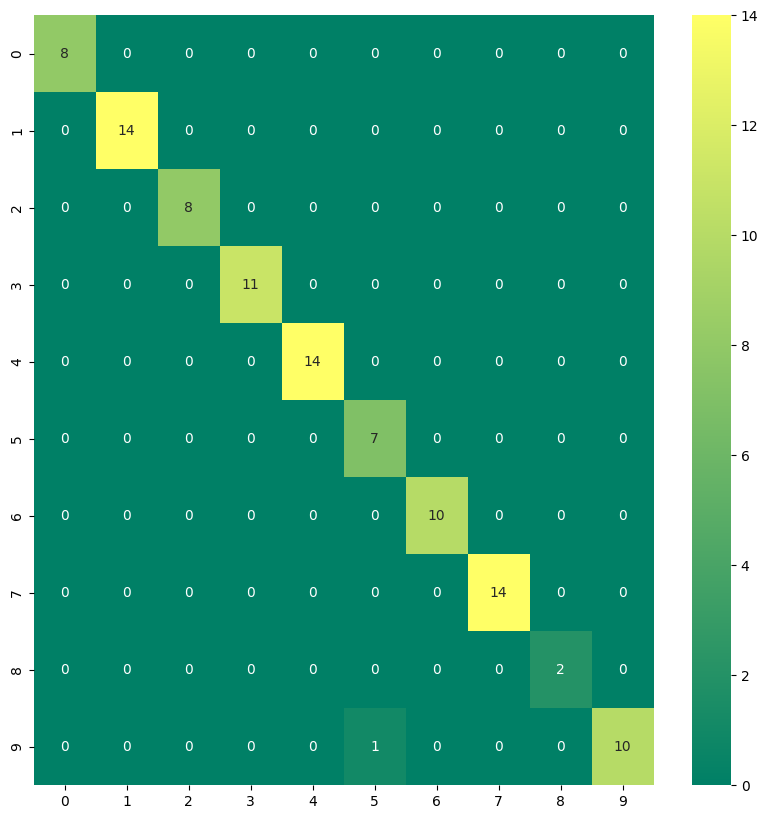

In [ ]:
predictions=model.predict(X_test[1:100])
predictions=np.argmax(predictions,axis=1)
plt.figure(figsize=(10,10))
cm=confusion_matrix(y_test[1:100],predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap='summer', fmt='g', ax=ax);



In [ ]:
print(X_test[1:5].shape)


(4, 28, 28, 1)


In [ ]:
print(predictions.shape)
print(y_test.shape)

(99,)
(10000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Build CNN model using Functional API
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name='last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Grad-CAM function
def compute_gradcam(model, image, label_index, layer_name='last_conv'):
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, label_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8946 - loss: 0.3294 - val_accuracy: 0.9862 - val_loss: 0.0543
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9850 - loss: 0.0481 - val_accuracy: 0.9870 - val_loss: 0.0470
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9898 - loss: 0.0320 - val_accuracy: 0.9903 - val_loss: 0.0347
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9922 - loss: 0.0234 - val_accuracy: 0.9880 - val_loss: 0.0417
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9920 - val_loss: 0.0369


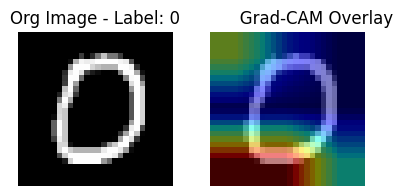

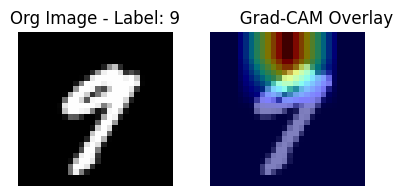

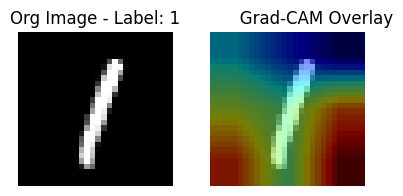

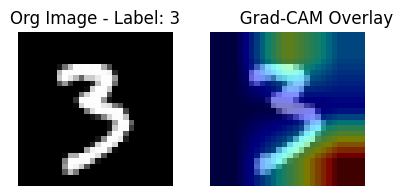

In [ ]:
# Visualize Grad-CAM
image_index = [10,20,5,30]
for i in image_index:
  image = X_test[i]
  label = y_test[i]
  ro+=1
  heatmap = compute_gradcam(model, image, label)
# Resize heatmap to match input image
  heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [28, 28]).numpy().squeeze()
  plt.figure(figsize=(4, 2))
  plt.subplot(1, 2, 1)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(f"Org Image - Label: {label}")
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
  plt.title("           Grad-CAM Overlay")
  plt.axis('off')
  plt.tight_layout()
  plt.show()

In [1]:

!pip install -q tensorflow matplotlib seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers, models, regularizers, Model
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# ------------------------------------------------------------------
# UTILS
# ------------------------------------------------------------------
def plot_confusion(y_true, y_pred, title="Confusion Matrix", labels=None, cmap='Blues'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=labels if labels is not None else np.unique(y_true),
                yticklabels=labels if labels is not None else np.unique(y_true))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()
def compute_gradcam(model, image, class_index, last_conv_name):
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(last_conv_name).output, model.output])
    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_out, preds = grad_model(inputs)
        loss = preds[:, class_index]
    grads = tape.gradient(loss, conv_out)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_out = conv_out[0]
    heatmap = tf.reduce_sum(tf.multiply(conv_out, pooled_grads), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-9)
    return heatmap.numpy()

def show_gradcam_overlay(gray_or_rgb_img, heatmap, alpha=0.5):
    if heatmap.ndim == 2:
        h = tf.image.resize(heatmap[..., None], gray_or_rgb_img.shape[:2]).numpy().squeeze()
    else:
        h = tf.image.resize(heatmap, gray_or_rgb_img.shape[:2]).numpy().squeeze()
    plt.imshow(gray_or_rgb_img.squeeze(), cmap='gray' if gray_or_rgb_img.shape[-1]==1 else None)
    plt.imshow(h, cmap='jet', alpha=alpha)
    plt.axis('off'); plt.show()


In [2]:
# ------------------------------------------------------------------
# PART A: MNIST
# ------------------------------------------------------------------
print("\n=== MNIST: load & preprocess ===")
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)  # (N,28,28,1)
X_test  = np.expand_dims(X_test, -1)
num_classes = 10

# ---------- CNN builder with variable number of conv blocks ----------
def build_mnist_cnn(conv_blocks=2, base_filters=32, last_conv_name="last_conv"):
    inp = layers.Input(shape=(28,28,1))
    x = inp
    filters = base_filters
    for b in range(conv_blocks):
        x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        # downsample every block
        x = layers.MaxPooling2D(2)(x)
        filters = min(filters*2, 256)
    x = layers.Conv2D(filters, 3, activation='relu', padding='same', name=last_conv_name)(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inp, out, name=f"mnist_cnn_{conv_blocks}blocks")
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


=== MNIST: load & preprocess ===
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



--- Training MNIST CNN with 1 conv block(s) ---
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8854 - loss: 0.3879 - val_accuracy: 0.8782 - val_loss: 0.3804
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9857 - loss: 0.0461 - val_accuracy: 0.9872 - val_loss: 0.0471
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9907 - loss: 0.0293 - val_accuracy: 0.9900 - val_loss: 0.0374
[MNIST CNN 1 blocks] Test accuracy: 0.9900


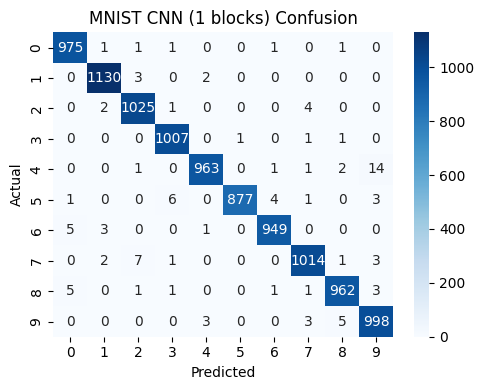


--- Training MNIST CNN with 2 conv block(s) ---
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.8959 - loss: 0.3546 - val_accuracy: 0.9005 - val_loss: 0.3218
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9865 - loss: 0.0425 - val_accuracy: 0.9912 - val_loss: 0.0325
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9897 - val_loss: 0.0342
[MNIST CNN 2 blocks] Test accuracy: 0.9886


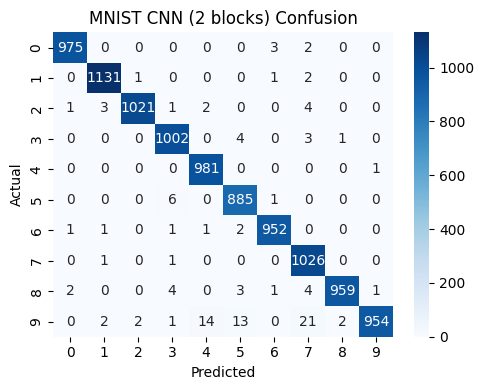


--- Training MNIST CNN with 3 conv block(s) ---
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8933 - loss: 0.3429 - val_accuracy: 0.9005 - val_loss: 0.3572
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9884 - loss: 0.0389 - val_accuracy: 0.9915 - val_loss: 0.0288
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9912 - loss: 0.0288 - val_accuracy: 0.9893 - val_loss: 0.0369
[MNIST CNN 3 blocks] Test accuracy: 0.9904


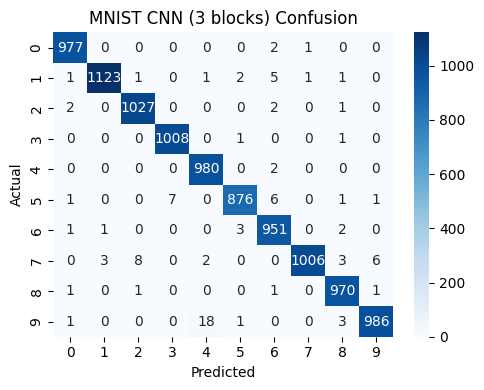


MNIST CNN accuracy by depth:
  Blocks=1: acc=0.9900
  Blocks=2: acc=0.9886
  Blocks=3: acc=0.9904

--- Training MNIST ANN baseline (Flatten + Dense) ---
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7877 - loss: 0.6839 - val_accuracy: 0.9638 - val_loss: 0.1236
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9460 - loss: 0.1820 - val_accuracy: 0.9732 - val_loss: 0.0900
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9585 - loss: 0.1369 - val_accuracy: 0.9780 - val_loss: 0.0759
[MNIST ANN] Test accuracy: 0.9715

--- MNIST Grad-CAM examples (from last CNN trained) ---
MNIST sample #5 | Pred: 1 | True: 1


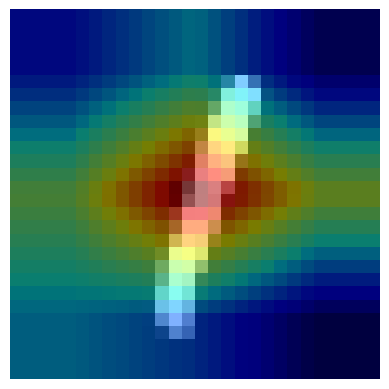

MNIST sample #50 | Pred: 6 | True: 6


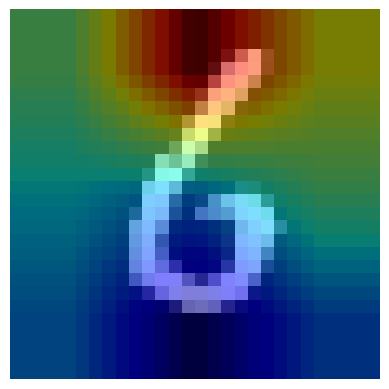

MNIST sample #500 | Pred: 3 | True: 3


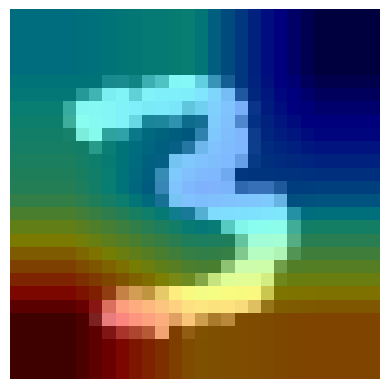

MNIST sample #1500 | Pred: 7 | True: 7


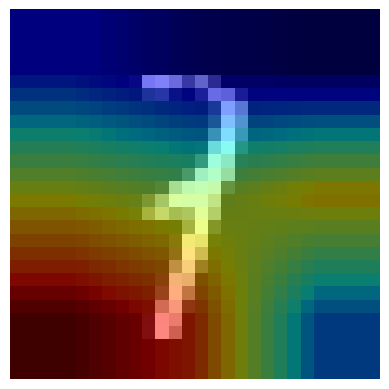

In [3]:
# ---------- Train CNNs with different depths ----------
MNIST_CONV_BLOCKS = [1, 2, 3]  # change to observe accuracy changes
mnist_results = []

for blocks in MNIST_CONV_BLOCKS:
    print(f"\n--- Training MNIST CNN with {blocks} conv block(s) ---")
    cnn = build_mnist_cnn(conv_blocks=blocks, base_filters=32, last_conv_name="mnist_last_conv")
    h = cnn.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.1, verbose=1)
    test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=0)
    print(f"[MNIST CNN {blocks} blocks] Test accuracy: {test_acc:.4f}")
    mnist_results.append((blocks, test_acc))
    # Confusion matrix (optional quick sample)
    y_pred = np.argmax(cnn.predict(X_test, verbose=0), axis=1)
    plot_confusion(y_test, y_pred, title=f"MNIST CNN ({blocks} blocks) Confusion")

print("\nMNIST CNN accuracy by depth:")
for b, acc in mnist_results:
    print(f"  Blocks={b}: acc={acc:.4f}")
# ---------- Optional: ANN baseline on MNIST ----------
print("\n--- Training MNIST ANN baseline (Flatten + Dense) ---")
ann = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.1, verbose=1)
ann_test_acc = ann.evaluate(X_test, y_test, verbose=0)[1]
print(f"[MNIST ANN] Test accuracy: {ann_test_acc:.4f}")

# ---------- Grad-CAM on MNIST (use the last trained CNN) ----------
print("\n--- MNIST Grad-CAM examples (from last CNN trained) ---")
mnist_cnn_for_xai = build_mnist_cnn(conv_blocks=MNIST_CONV_BLOCKS[-1], base_filters=32, last_conv_name="mnist_last_conv")
mnist_cnn_for_xai.fit(X_train, y_train, epochs=2, batch_size=128, validation_split=0.1, verbose=0)
idxs = [5, 50, 500, 1500]
for i in idxs:
    img = X_test[i]
    pred = np.argmax(mnist_cnn_for_xai.predict(img[None, ...], verbose=0), axis=1)[0]
    heat = compute_gradcam(mnist_cnn_for_xai, img, pred, last_conv_name="mnist_last_conv")
    print(f"MNIST sample #{i} | Pred: {pred} | True: {y_test[i]}")
    show_gradcam_overlay(img, heat, alpha=0.5)


=== CIFAR-10: Load & preprocess ===
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

--- CIFAR-10: Train WITH POOLING ---
Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.3356 - loss: 1.8032 - val_accuracy: 0.5604 - val_loss: 1.2385
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5778 - loss: 1.1886 - val_accuracy: 0.6518 - val_loss: 1.0149
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6533 - loss: 0.9762 - val_accuracy: 0.6856 - val_loss: 0.8937
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7007 - loss: 0.8553 - val_accuracy: 0.7194 - val_loss: 0.8449
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7351 - loss: 0.7535 - val_accuracy: 0.7490 - val_loss: 0.7536
[CIFAR-10 WITH POOL] Test accuracy: 0.7336

--- CIFAR-10: Train WITHOUT POOLING (strided conv) ---
Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.3098 - loss: 1.8710 - val_accuracy: 0.5060 - val_loss: 1.3462
Epo

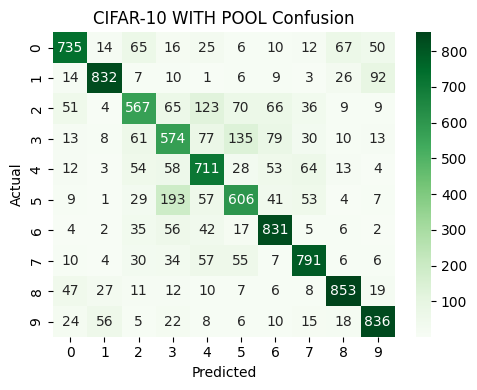

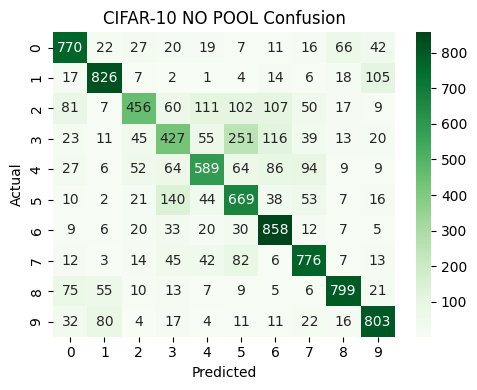


--- CIFAR-10: Grad-CAM Examples (WITH POOL model) ---
CIFAR #10 | Pred=airplane | True=airplane


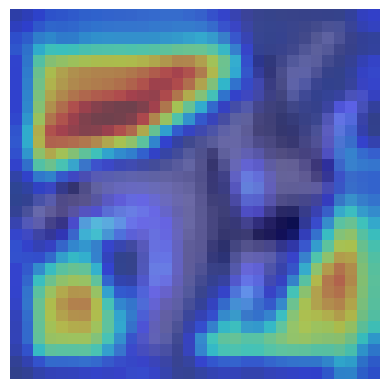

CIFAR #250 | Pred=horse | True=dog


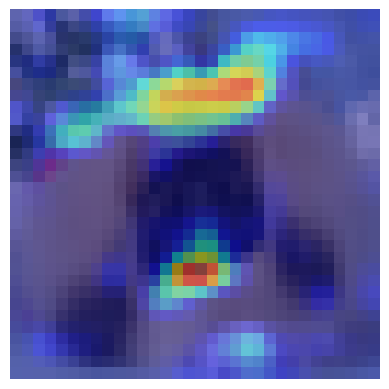

CIFAR #1000 | Pred=dog | True=dog


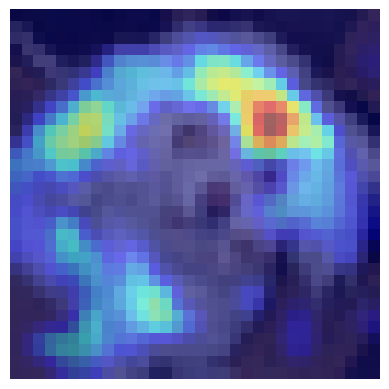

CIFAR #2500 | Pred=frog | True=deer


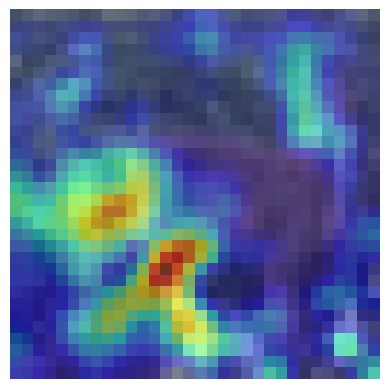


DONE.


In [5]:
# ============================================
# PART B: CIFAR-10 (Portfolio)
# With Pooling vs Without Pooling (strided conv)
# + Grad-CAM
# ============================================
print("\n=== CIFAR-10: Load & preprocess ===")
(Xc_train, yc_train), (Xc_test, yc_test) = cifar10.load_data()
Xc_train = (Xc_train.astype("float32") / 255.0)
Xc_test  = (Xc_test.astype("float32") / 255.0)
yc_train = yc_train.squeeze()
yc_test  = yc_test.squeeze()
cifar_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def build_cifar_with_pool(last_conv_name="cifar_last_conv_pool"):
    inp = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(inp)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(2)(x)  # POOL
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu', name=last_conv_name)(x)
    x = layers.MaxPooling2D(2)(x)  # POOL
    x = layers.Flatten()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    out = layers.Dense(10, activation='softmax')(x)
    m = Model(inp, out, name="cifar_with_pool")
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return m

def build_cifar_no_pool(last_conv_name="cifar_last_conv_nopool"):
    inp = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(inp)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(32, 3, strides=2, padding='same', activation='relu')(x)   # stride instead of pool
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu', name=last_conv_name)(x)
    x = layers.Conv2D(64, 3, strides=2, padding='same', activation='relu')(x)   # stride instead of pool
    x = layers.Flatten()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    out = layers.Dense(10, activation='softmax')(x)
    m = Model(inp, out, name="cifar_no_pool")
    m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return m
EPOCHS_CIFAR = 5   # set to 10 for better accuracy if you have time

print("\n--- CIFAR-10: Train WITH POOLING ---")
cifar_pool = build_cifar_with_pool()
cifar_pool.fit(Xc_train, yc_train, epochs=EPOCHS_CIFAR, batch_size=128, validation_split=0.1, verbose=1)
pool_acc = cifar_pool.evaluate(Xc_test, yc_test, verbose=0)[1]
print(f"[CIFAR-10 WITH POOL] Test accuracy: {pool_acc:.4f}")

print("\n--- CIFAR-10: Train WITHOUT POOLING (strided conv) ---")
cifar_nopool = build_cifar_no_pool()
cifar_nopool.fit(Xc_train, yc_train, epochs=EPOCHS_CIFAR, batch_size=128, validation_split=0.1, verbose=1)
nopool_acc = cifar_nopool.evaluate(Xc_test, yc_test, verbose=0)[1]
print(f"[CIFAR-10 NO POOL] Test accuracy: {nopool_acc:.4f}")

print("\nCIFAR-10 accuracy comparison:")
print(f"  With Pooling : {pool_acc:.4f}")
print(f"  No Pooling   : {nopool_acc:.4f}")

# Confusion matrices (optional)
for title, model in [("CIFAR-10 WITH POOL", cifar_pool), ("CIFAR-10 NO POOL", cifar_nopool)]:
    preds = np.argmax(model.predict(Xc_test, verbose=0), axis=1)
    plot_confusion(yc_test, preds, title=f"{title} Confusion", labels=range(10), cmap='Greens' if 'POOL' in title else 'Oranges')

# CIFAR-10 Grad-CAM (use the with-pooling model)
print("\n--- CIFAR-10: Grad-CAM Examples (WITH POOL model) ---")
example_idxs = [10, 250, 1000, 2500]
for i in example_idxs:
    img = Xc_test[i]
    pred = np.argmax(cifar_pool.predict(img[None, ...], verbose=0), axis=1)[0]
    heat = compute_gradcam(cifar_pool, img, pred, last_conv_name="cifar_last_conv_pool")
    print(f"CIFAR #{i} | Pred={cifar_labels[pred]} | True={cifar_labels[yc_test[i]]}")
    show_gradcam_overlay(img, heat, alpha=0.5)

print("\nDONE.")